<a href="https://colab.research.google.com/github/RazvanGolan/Faculty-3rd-year/blob/main/bia/lab6/bia_exercises6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# exercise 1

from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
np.random.seed(42)

X, y = make_blobs(
    n_samples=400,
    centers=4,
    cluster_std=1.25,
    random_state=42
)

kmeans = KMeans(n_clusters=4, random_state=42, init="random", n_init=1,
                     algorithm="lloyd", max_iter=40)
y_pred = kmeans.fit_predict(X)


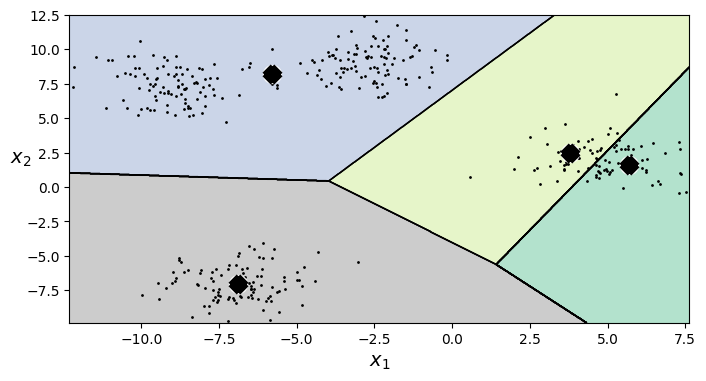

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=35, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

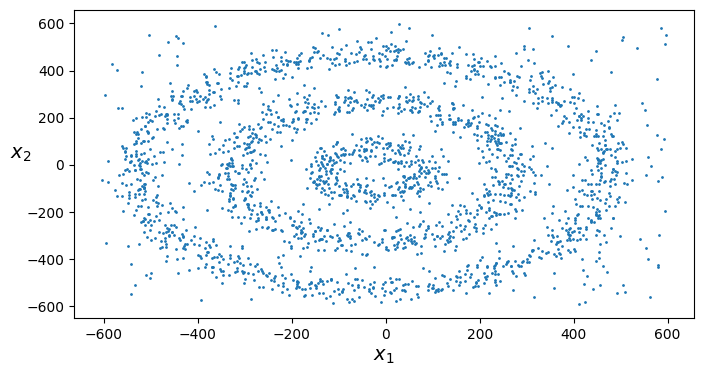

In [ ]:
# exercise 2

import math
import pandas as pd

def Circle (r, n):
  return [(math.cos(2*math.pi/n*x)*r+
           np.random.normal(-30, 30), math.sin(2*math.pi/n*x)*r+
           np.random.normal(-30, 30)) for x in range(1, n+1)]

df1 = pd.DataFrame(Circle(500, 1000))
df2 = pd.DataFrame(Circle(300, 700))
df3 = pd.DataFrame(Circle(100, 300))

df = pd.concat([df1, df2, df3])

random_points_df = pd.DataFrame([(np.random.randint(-600, 600), np.random.randint(-600, 600)) for i in range(300)])
X = pd.concat([df, random_points_df])

def plot_clusters(X, y=None):
    plt.scatter(X[0], X[1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

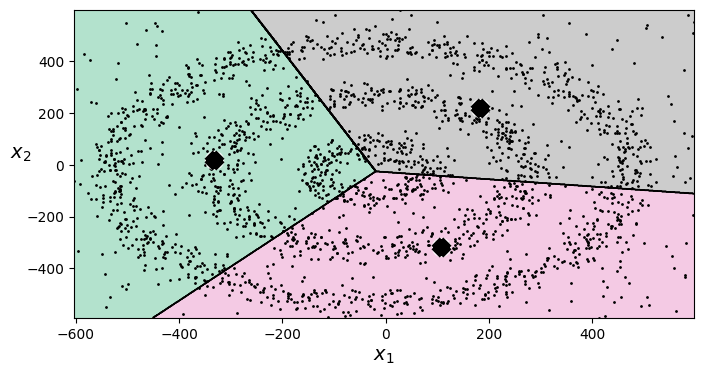

In [ ]:
kmeans = KMeans(n_clusters=3, init="k-means++")
y_pred = kmeans.fit_predict(X)

def plot_data(X):
    plt.plot(X[0], X[1], 'k.', markersize=2)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

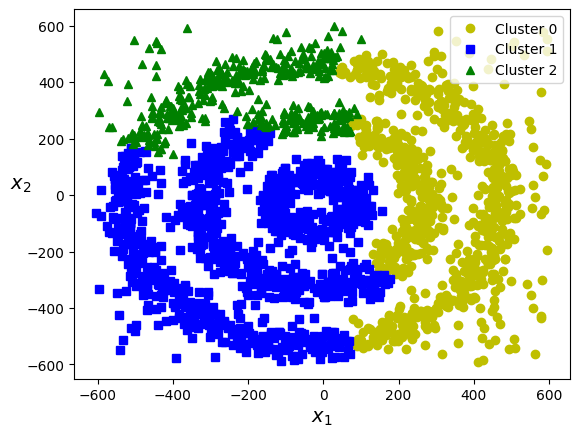

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, linkage="complete")
clusters = agg.fit_predict(X)

plt.plot(X.iloc[clusters==0, 0], X.iloc[clusters==0, 1], "yo")
plt.plot(X.iloc[clusters==1, 0], X.iloc[clusters==1, 1], "bs")
plt.plot(X.iloc[clusters==2, 0], X.iloc[clusters==2, 1], "g^")
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()

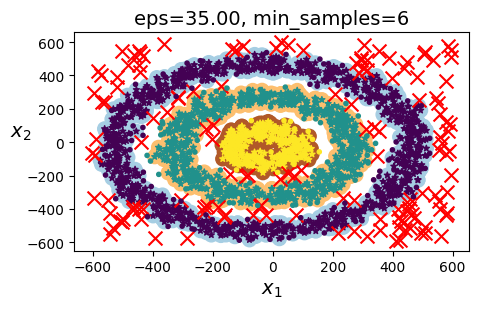

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=35, min_samples=6)
dbscan.fit(X)

def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    noise_mask = (dbscan.labels_ == -1)
    non_core_mask = ~(core_mask | noise_mask)

    cores = dbscan.components_
    noise = X[noise_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(noise[0], noise[1], c="r", marker="x", s=100)
    plt.scatter(non_cores[0], non_cores[1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.tight_layout()
plt.show()